# Passo 1 - Baixar os dados

In [48]:
# importanto bibliotecas
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [49]:
df_churn = pd.read_csv('/datasets/gym_churn_us.csv')

# Passo 2 - Análise exploratória dos dados

In [50]:
df_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [51]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [52]:
df_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


- não possui valores ausentes 


In [53]:
df_churn.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


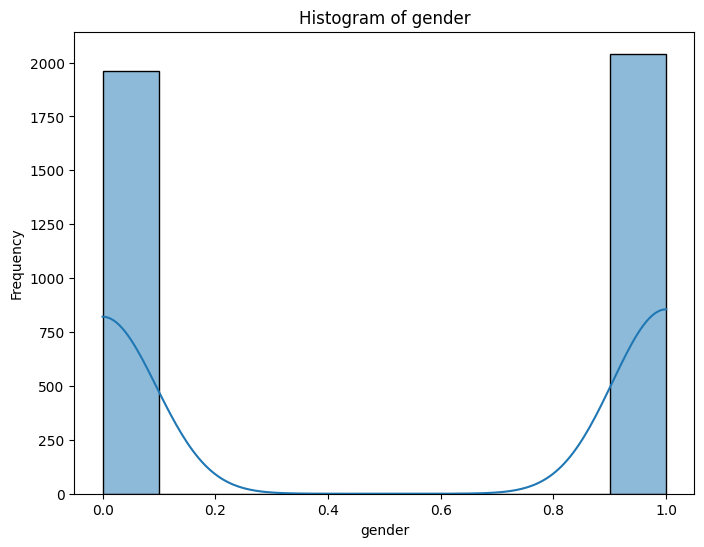

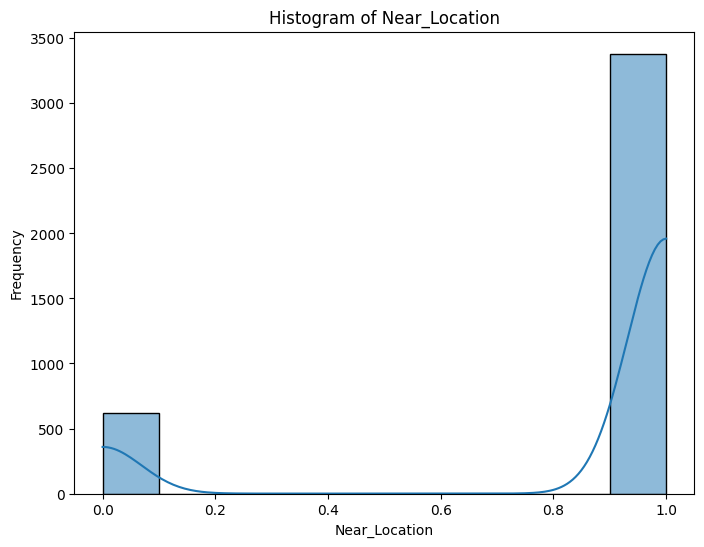

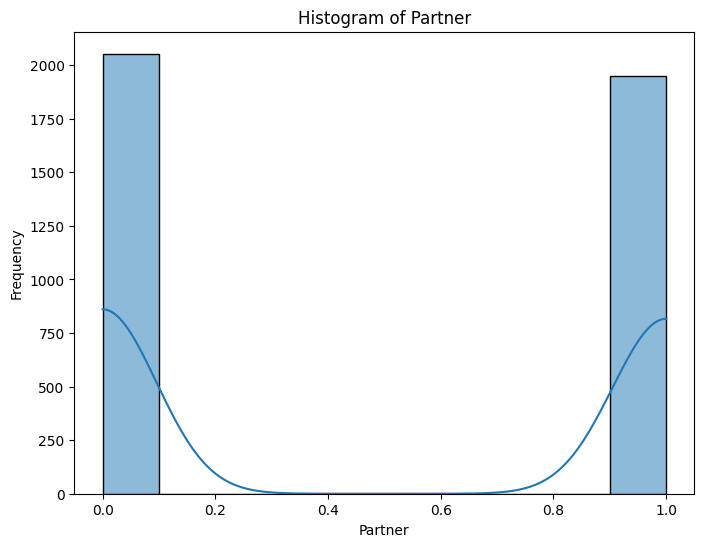

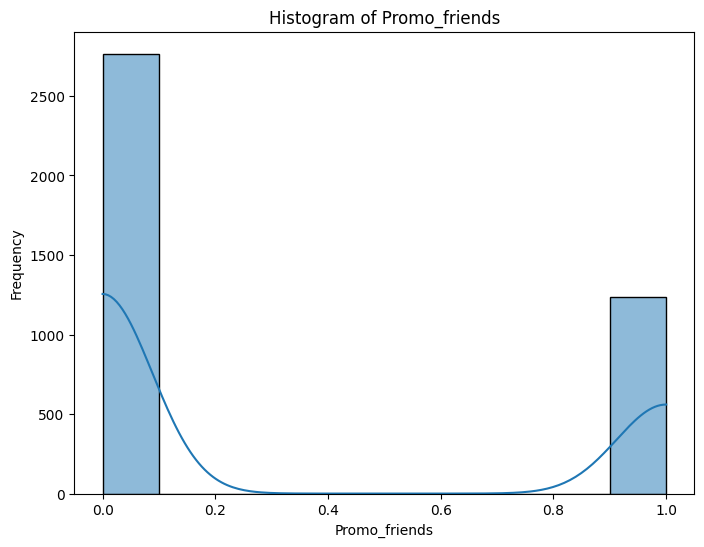

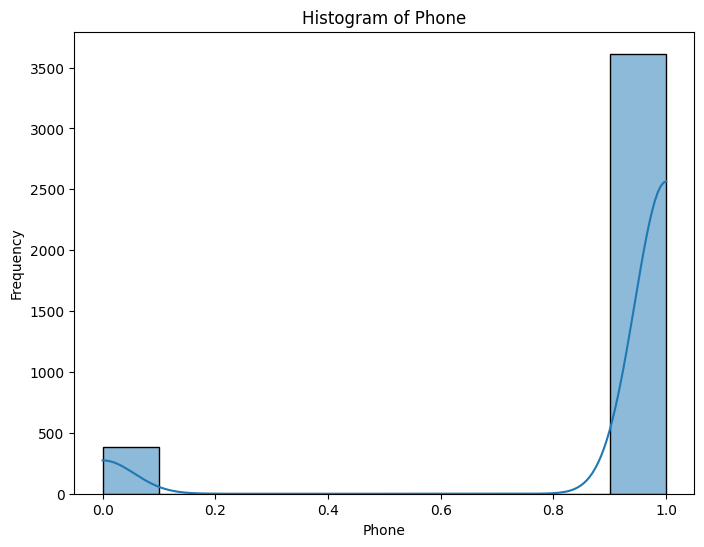

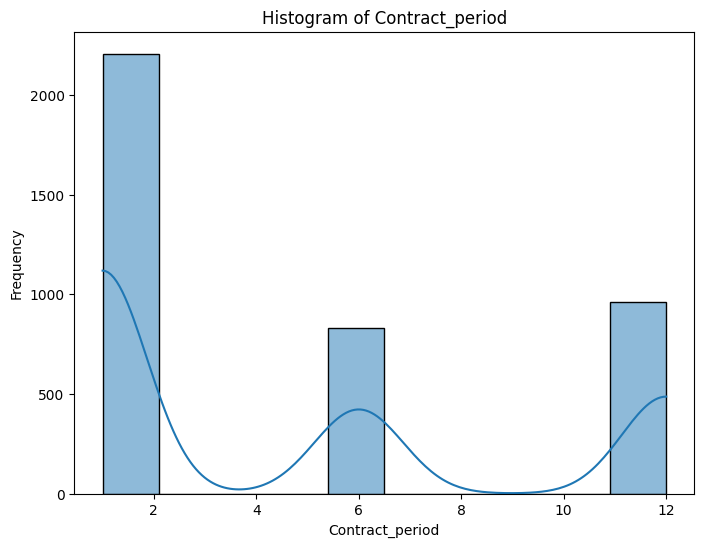

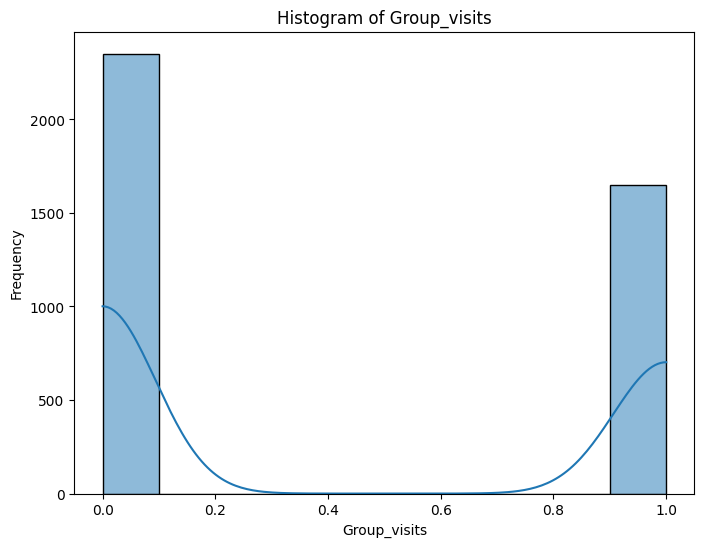

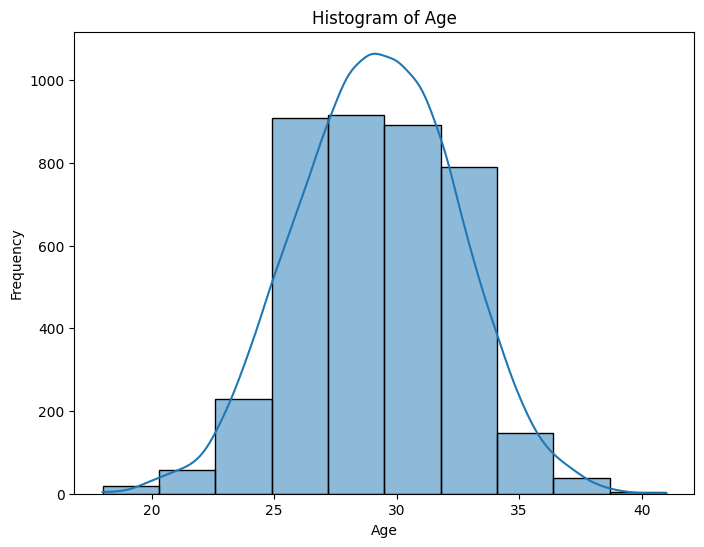

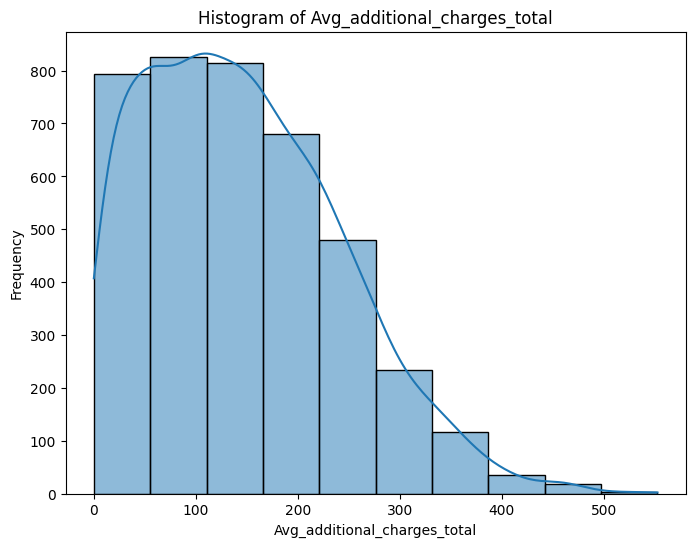

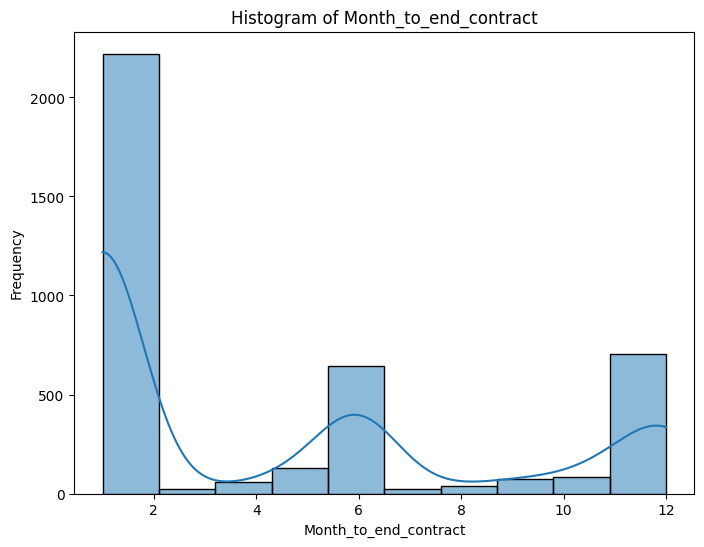

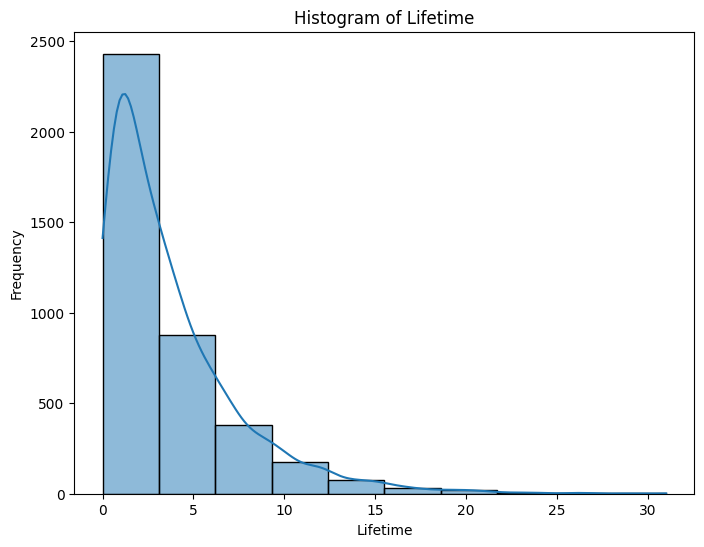

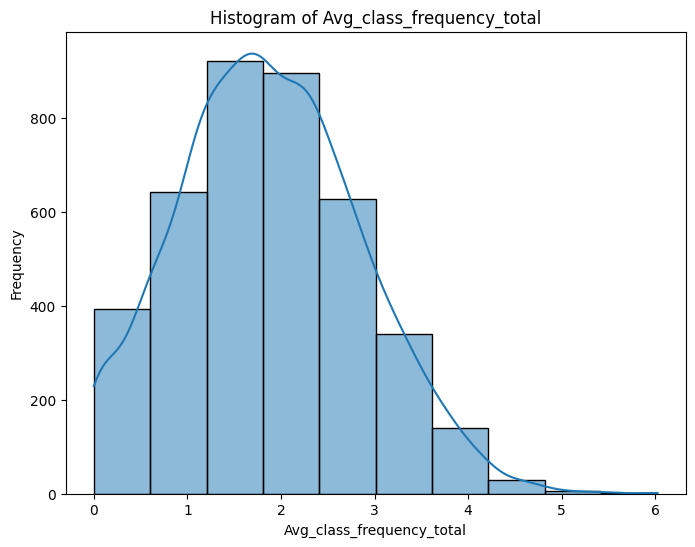

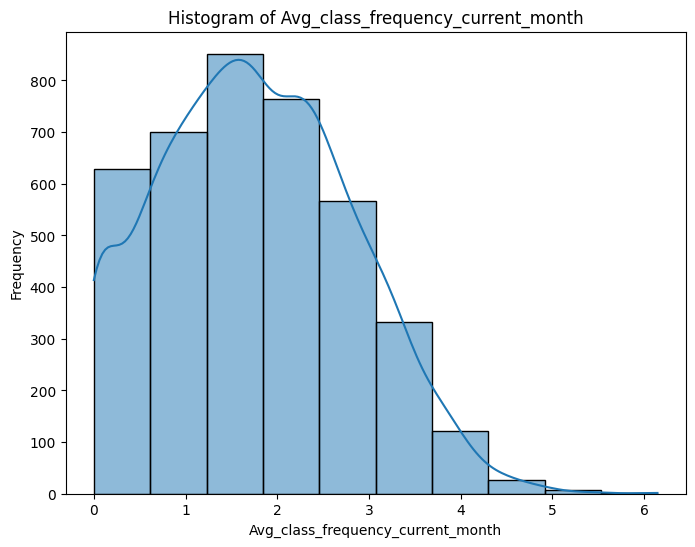

In [54]:
for col in df_churn.drop('Churn', axis=1).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df_churn[col], kde=True, bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

- o genero não influencia se o usuário vai ficar ou não
- a lcoalização influencia bastante
- se o usuário foi um funcionário de uma companhia parceira não influencia
- se o cliente veio atraves de uma pormoção influencia bastante
- informar o número de telefone influencia muito
- o tempo influencia e pode variar bastante
- entre os que participam de sessões em grupo, a diferença é pequena
- a idade varia muito e fica semelhante a uma distribuição normal
- a quantidade total de dinheiro gasto em outros serviços está indiretamente relacionado, quanto mais gasta menos sofrem churn
- os meses remanescentes variam muito, sem ficar claro se influencia ou não
- o tempo desde a primeira visita é inversamente influenciado
- a frequencia média de idas por semana está inversamente ligada, quanto mais vezes o cliente frequenta, menos possibildiade de sair

In [55]:
df_churn.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


- existem duas correlações bem fortes
- entre contract_period e month_to_end_contract
- e entre avg_class_frequency_total e avg_class_frequency_current_month

# Passo 3 - Modelo para predizer a rotatividade de clientes

In [56]:
X = df_churn.drop(columns = ['Churn'])
y = df_churn['Churn']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [58]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
probabilities = model.predict_proba(X_test)

In [59]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

In [60]:
def print_all_metrics(y_true, y_pred, y_proba, title = 'Métricas de classificação'):
    print(title)
    print('\tAcurácia: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecisão: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tSensibilidade: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_pred)))

In [61]:
print_all_metrics(y_test, predictions, probabilities, title = 'Métricas para regressão logística')

Métricas para regressão logística
	Acurácia: 0.94
	Precisão: 0.88
	Sensibilidade: 0.88
	F1: 0.88
	ROC_AUC: 0.92


In [62]:
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Métricas para floresta aleatória')

Métricas para floresta aleatória
	Acurácia: 0.93
	Precisão: 0.87
	Sensibilidade: 0.83
	F1: 0.85
	ROC_AUC: 0.89


- comparando as duas métricas, a diferença é bem pequena
- porém a floresta aleatória é um pouco melhor

In [63]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [64]:
linked = linkage(X_sc, method = 'ward')

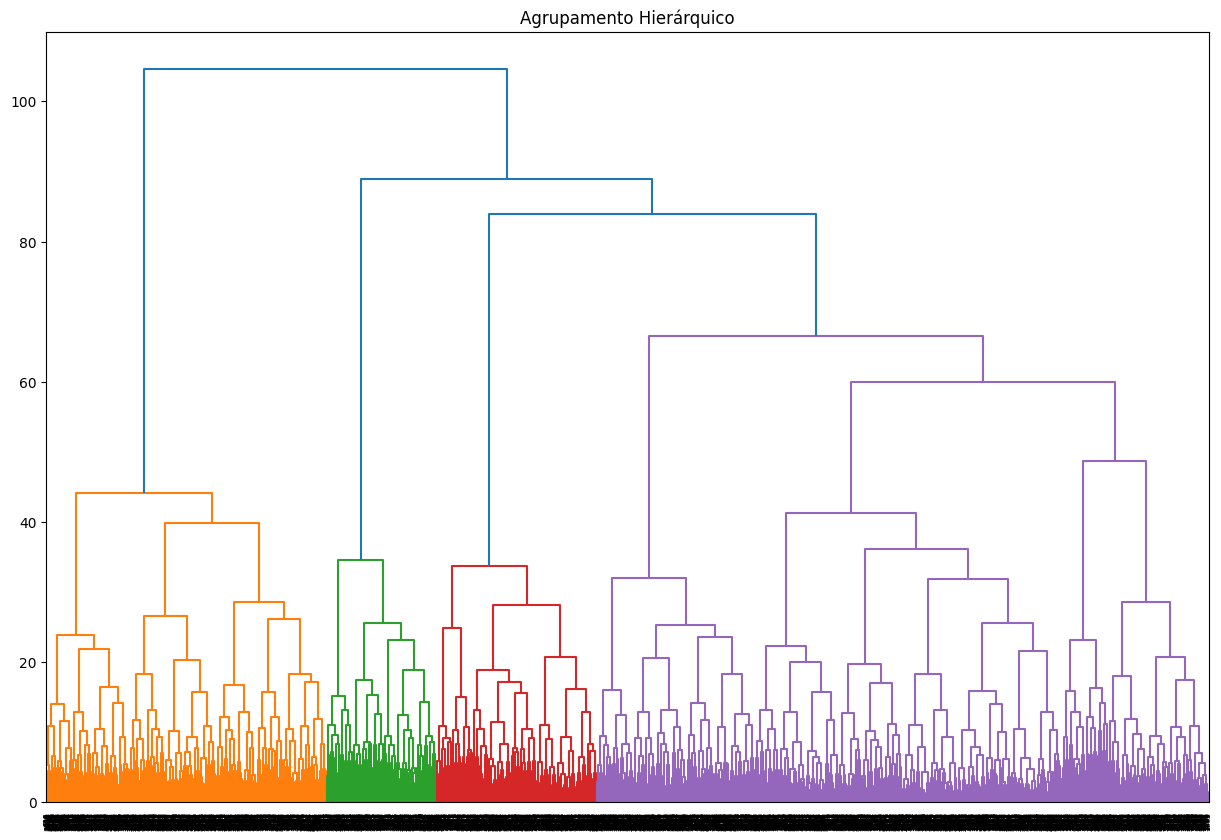

In [65]:
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Agrupamento Hierárquico')
plt.show()

In [67]:
km = KMeans(n_clusters = 5)
labels = km.fit_predict(X_sc)
df_churn['Churn'] = labels

In [68]:
df_churn.groupby(['Churn']).mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369
1,0.486529,1.000000,0.351030,0.239303,1.000000,1.952456,0.342314,28.168780,131.412543,1.860539,2.442948,1.247290,1.012697
2,0.557396,0.976331,0.359763,0.235503,0.998817,2.691124,0.468639,30.112426,161.820303,2.481657,4.879290,2.850505,2.848987
3,0.503490,0.959123,0.782652,0.573280,1.000000,10.923230,0.546361,29.991027,160.881742,9.983051,4.748754,1.977676,1.970029
4,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324


- olhando para as médias entre os grupos
- em algumas caracteristicas, a diferença das médias entre os grupos são bem pequenas, como no caso de genero
- em algumas, a diferença entre as médias é bem grande como no cado do promo_friends
- em algumas, a média de algum grupo é zero como no cado do grupo 4 em near_location
- em algumas, a média de algum grupo é um como no caso do grupo 1 em near_location
- a caracteristica phone, praticamente não existe diferença entre os grupos

In [77]:

def show_churn_on_plot(df_churn, x_name, y_name, churn_name):
    plt.figure(figsize=(10, 10))
    sns.scatterplot(x=df_churn[x_name], y=df_churn[y_name], hue=df_churn[churn_name], palette='Paired')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [81]:
df_churn.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime',
       'Avg_class_frequency_total', 'Avg_class_frequency_current_month',
       'Churn'],
      dtype='object')

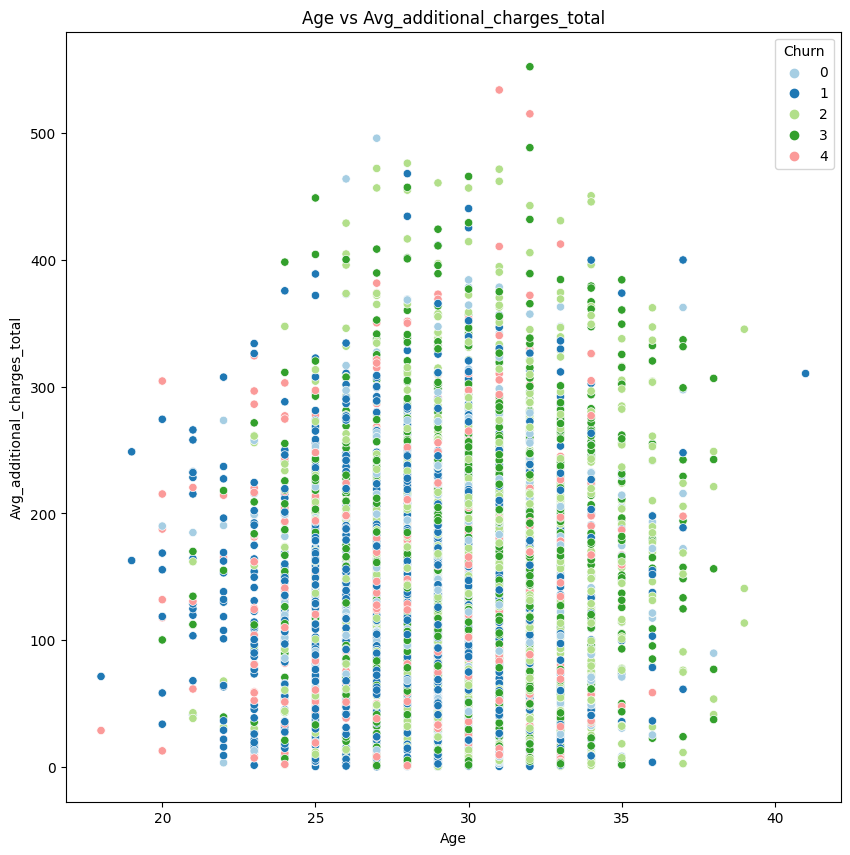

In [79]:
show_churn_on_plot(df_churn, 'Age', 'Avg_additional_charges_total', 'Churn')

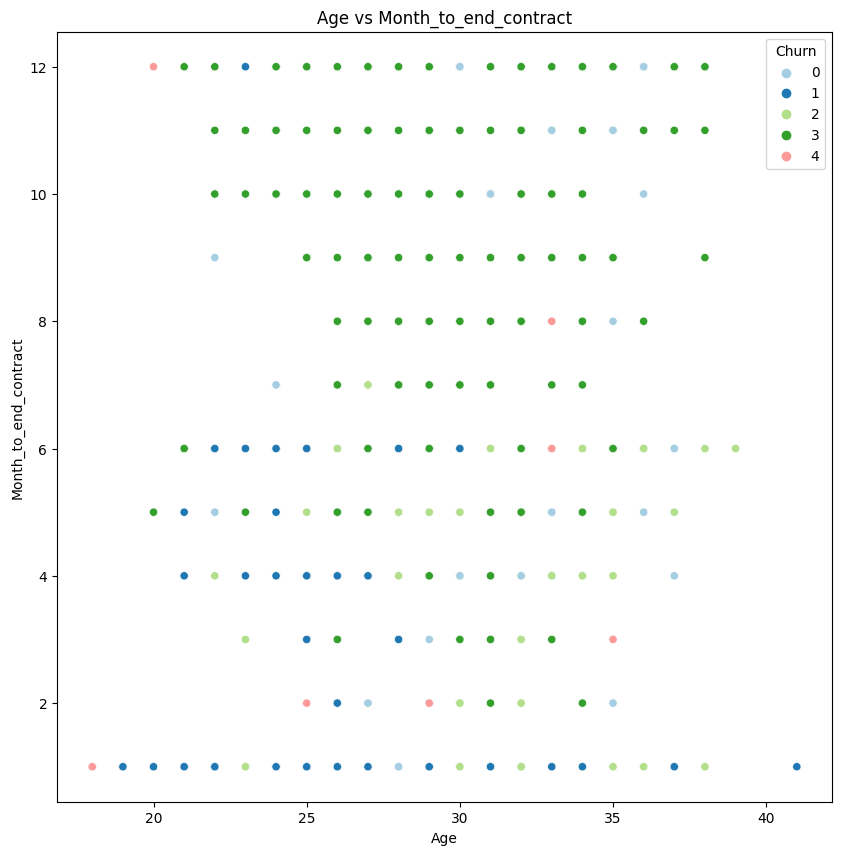

In [83]:
show_churn_on_plot(df_churn, 'Age', 'Month_to_end_contract', 'Churn')

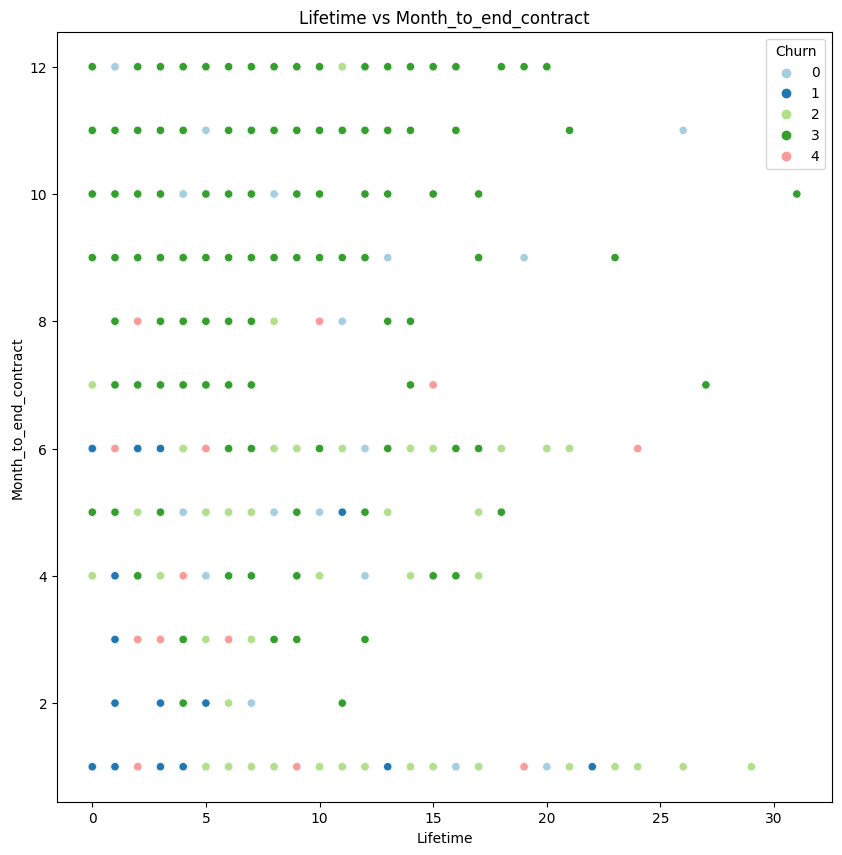

In [84]:
show_churn_on_plot(df_churn, 'Lifetime', 'Month_to_end_contract', 'Churn')

- os agrupamentos variam bastante dependendo das caracteristicas escolhidas

# Passo 5 - Conclusão

- fazendo todos as avaliações, avaliando os métodos, vendo a relação entre as caracteristicas, como elas estão relacionadas entre si e como elas se relacionam com o churn
- com isso, é possivel ver que existem caracteristicas que influenciam mais no churn
- uma dessas caracteristicas é a localização
- por outro lado, existem caracteristicas que não influenciam o churn
- um exemplo é o genero, ou seja, não importa o genero do cliente que isso não influencia se o cleunte vai fica